In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import pandas as pd
import sqlalchemy as sa
import os
from dotenv import load_dotenv

from sqlalchemy import create_engine, text
import urllib.parse


fs_server = os.getenv('FACTORY_SYSTEMS_DB_SERVER')
fs_database = os.getenv('FACTORY_SYSTEMS_DB_NAME')
fs_username = os.getenv('FACTORY_SYSTEMS_DB_USER')
fs_password = os.getenv('FACTORY_SYSTEMS_DB_PASSWORD')

se_server = os.getenv('SE_DB_SERVER')
se_database = os.getenv('SE_DB_NAME')
se_username = os.getenv('SE_DB_USER')
se_password = os.getenv('SE_DB_PASSWORD')

# Load environment variables
load_dotenv()

True

In [3]:
# Create a connection string
fs_params = urllib.parse.quote_plus(
    f'DRIVER={{{os.getenv("DB_DRIVER")}}};'
    f'SERVER={fs_server};'
    f'DATABASE={fs_database};'
    f'UID={fs_username};'
    f'PWD={fs_password}'
)

# Create a connection string
se_params = urllib.parse.quote_plus(
    f'DRIVER={{{os.getenv("DB_DRIVER")}}};'
    f'SERVER={se_server};'
    f'DATABASE={se_database};'
    f'UID={se_username};'
    f'PWD={se_password}'
)

In [4]:
#df_item_lookup = pd.read_csv("initial_files/csv_files/item_lookup.csv", encoding='latin-1')
#df_fetch_requests = pd.read_csv("initial_files/csv_files/lou_mes_retrieval_requests.csv")
#df_workbench_jobs = pd.read_csv("initial_files/csv_files/lou_workbench_jobs.csv")

In [5]:
#df_item_lookup.dtypes
#df_fetch_requests.dtypes
#df_workbench_jobs.dtypes

In [6]:
# Create the SQLAlchemy engine (FS DB)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={fs_params}")
# Try to connect and execute a simple query
with engine.connect() as connection:

    # Write SQL Query here
    query = text(
                    
"""
SELECT DISTINCT
SEGMENT1 as item
,ITEM_TYPE as item_type
,DESCRIPTION as description

FROM Inventory.EBS_Item  

"""
                    )

    result = connection.execute(query)
    print(result)
    df_item_lookup = pd.DataFrame(result.fetchall(), columns=result.keys())

In [7]:
# Create the SQLAlchemy engine (SE DB)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={se_params}")
# Try to connect and execute a simple query
with engine.connect() as connection:

    # Write SQL Query here
    query = text(
                    
"""
SELECT DISTINCT
            [WHSE] AS ORG
			--,CONCAT(WHSE, RIGHT(TO_LOCATION,1)) AS Line
      ,CASE
        WHEN TO_LOCATION LIKE '%L1.HOFF.01%' AND WHSE = 'ALA' THEN 'ALA1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'ATL' THEN 'ATL1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.02%' AND WHSE = 'ATL' THEN 'ATL2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.03%' AND WHSE = 'ATL' THEN 'ATL3'
		WHEN TO_LOCATION LIKE '%L1.HOFF.01%' AND WHSE = 'BAK' THEN 'BAK1'
		WHEN TO_LOCATION LIKE '%L1.HOFF.02%' AND WHSE = 'BAK' THEN 'BAK1'
		WHEN TO_LOCATION LIKE '%L2.HOFF.01%' AND WHSE = 'BAK' THEN 'BAK2'
		WHEN TO_LOCATION LIKE '%L2.HOFF.02%' AND WHSE = 'BAK' THEN 'BAK2'
		WHEN TO_LOCATION LIKE '%L1.HOFF.01%' AND WHSE = 'BAY' THEN 'BAY1'
		WHEN TO_LOCATION LIKE '%L2.HOFF.02%' AND WHSE = 'BAY' THEN 'BAY2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'BLM' THEN 'BLM1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.02%' AND WHSE = 'BLM' THEN 'BLM2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.05%' AND WHSE = 'BLM' THEN 'BLM3'
		WHEN TO_LOCATION LIKE '%L1.HNDOFF.01%' AND WHSE = 'CAR' THEN 'CAR1'
		WHEN TO_LOCATION LIKE '%L1.HNDOFF.02%' AND WHSE = 'CAR' THEN 'CAR1'
		WHEN TO_LOCATION LIKE '%L2.HNDOFF.01%' AND WHSE = 'CAR' THEN 'CAR2'
		WHEN TO_LOCATION LIKE '%L2.HNDOFF.02%' AND WHSE = 'CAR' THEN 'CAR2'
		WHEN TO_LOCATION LIKE '%L3.HNDOFF.01%' AND WHSE = 'CAR' THEN 'CAR3'
		WHEN TO_LOCATION LIKE '%L3.HNDOFF.02%' AND WHSE = 'CAR' THEN 'CAR3'
		WHEN TO_LOCATION LIKE '%L4.HNDOFF.01%' AND WHSE = 'CAR' THEN 'CAR4'
		WHEN TO_LOCATION LIKE '%L4.HNDOFF.02%' AND WHSE = 'CAR' THEN 'CAR4'
		WHEN TO_LOCATION LIKE '%L5.HNDOFF.01%' AND WHSE = 'CAR' THEN 'CAR5'
		WHEN TO_LOCATION LIKE '%L5.HNDOFF.02%' AND WHSE = 'CAR' THEN 'CAR5'
		WHEN TO_LOCATION LIKE '%L1.HOFF.01%' AND WHSE = 'DET' THEN 'DET1'
		WHEN TO_LOCATION LIKE '%L2.HOFF.01%' AND WHSE = 'DET' THEN 'DET2'
		WHEN TO_LOCATION LIKE '%L1.HOFF%' AND WHSE = 'HAZ' THEN 'HAZ1'
		WHEN TO_LOCATION LIKE '%L2.HOFF%' AND WHSE = 'HAZ' THEN 'HAZ2'
		WHEN TO_LOCATION LIKE '%L3.HOFF%' AND WHSE = 'HAZ' THEN 'HAZ3'
		WHEN TO_LOCATION LIKE '%L4.HOFF%' AND WHSE = 'HAZ' THEN 'HAZ4'
		WHEN TO_LOCATION LIKE '%L1L2.RAW.HNDOFF%' AND WHSE = 'HOU' THEN 'HOU1'
		WHEN TO_LOCATION LIKE '%L3.RAW.HNDOFF%' AND WHSE = 'HOU' THEN 'HOU3'
		WHEN TO_LOCATION LIKE '%L4.RAW.HNDOFF%' AND WHSE = 'HOU' THEN 'HOU4'
		WHEN TO_LOCATION LIKE '%DDR.HOFF.L1%' AND WHSE = 'JAX' THEN 'JAX1'
		WHEN TO_LOCATION LIKE '%DDR.HOFF.L2%' AND WHSE = 'JAX' THEN 'JAX2'
		WHEN TO_LOCATION LIKE '%DDR.HOFF.L3%' AND WHSE = 'JAX' THEN 'JAX3'
		WHEN TO_LOCATION LIKE '%DDR.HOFF.L4%' AND WHSE = 'JAX' THEN 'JAX4'
		WHEN TO_LOCATION LIKE '%DDR.HOFF.L5%' AND WHSE = 'JAX' THEN 'JAX5'
		WHEN TO_LOCATION LIKE '%HOFF.01%' AND WHSE = 'KC2' THEN 'KC21'
		WHEN TO_LOCATION LIKE '%HOFF.02%' AND WHSE = 'KC2' THEN 'KC22'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'KEN' THEN 'KEN1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'KEN' THEN 'KEN2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'KEN' THEN 'KEN3'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'KEN' THEN 'KEN4'
		WHEN TO_LOCATION LIKE '%L1.HOFF%' AND WHSE = 'KNC' THEN 'KNC1'
		WHEN TO_LOCATION LIKE '%L2.HOFF%' AND WHSE = 'KNC' THEN 'KNC2'
		WHEN TO_LOCATION LIKE '%L3.HOFF%' AND WHSE = 'KNC' THEN 'KNC3'
		WHEN TO_LOCATION LIKE '%RDD.RAW.HOFF.L1%' AND WHSE = 'LOU' THEN 'LOU1'
		WHEN TO_LOCATION LIKE '%RDD.RAW.HOFF.L2%' AND WHSE = 'LOU' THEN 'LOU2'
		WHEN TO_LOCATION LIKE '%RDD.RAW.HOFF.L3%' AND WHSE = 'LOU' THEN 'LOU3'
		WHEN TO_LOCATION LIKE '%RDD.RAW.HOFF.L4%' AND WHSE = 'LOU' THEN 'LOU4'
		WHEN TO_LOCATION LIKE '%RDD.RAW.HOFF.L5%' AND WHSE = 'LOU' THEN 'LOU5'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'MES' THEN 'MES1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.05%' AND WHSE = 'MES' THEN 'MES2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.06%' AND WHSE = 'MES' THEN 'MES2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'MIA' THEN 'MIA1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.02%' AND WHSE = 'MIA' THEN 'MIA2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.07%' AND WHSE = 'MIA' THEN 'MIA3'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.04%' AND WHSE = 'MIA' THEN 'MIA5'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'MIS' THEN 'MIS1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.02%' AND WHSE = 'MIS' THEN 'MIS2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'MTY' THEN 'MTY1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'OKC' THEN 'OKC1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.02%' AND WHSE = 'OKC' THEN 'OKC1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.L2.01%' AND WHSE = 'OKC' THEN 'OKC2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.L2.02%' AND WHSE = 'OKC' THEN 'OKC2'
		WHEN TO_LOCATION LIKE '%RAW.HOFF.08%' AND WHSE = 'PIT' THEN 'PIT1'
		WHEN TO_LOCATION LIKE '%RAW.HOFF.09%' AND WHSE = 'PIT' THEN 'PIT1'
		WHEN TO_LOCATION LIKE '%RAW.HOFF.10%' AND WHSE = 'PIT' THEN 'PIT2'
		WHEN TO_LOCATION LIKE '%RAW.HOFF.11%' AND WHSE = 'PIT' THEN 'PIT2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'RCH' THEN 'RCH1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.02%' AND WHSE = 'RCH' THEN 'RCH2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.03%' AND WHSE = 'RCH' THEN 'RCH3'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'RIA' THEN 'RIA1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.01%' AND WHSE = 'SAN' THEN 'SAN1'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.02%' AND WHSE = 'SAN' THEN 'SAN2'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.03%' AND WHSE = 'SAN' THEN 'SAN3'
		WHEN TO_LOCATION LIKE '%RAW.HNDOFF.04%' AND WHSE = 'SAN' THEN 'SAN4'
		WHEN TO_LOCATION LIKE '%L1.HOFF.01%' AND WHSE = 'ST3' THEN 'ST31'
		WHEN TO_LOCATION LIKE '%L2.HOFF.01%' AND WHSE = 'ST3' THEN 'ST32'
		WHEN TO_LOCATION LIKE '%L1.RAW.HNDOFF.01%' AND WHSE = 'TAC' THEN 'TAC1'
		WHEN TO_LOCATION LIKE '%L1.RAW.HNDOFF.02%' AND WHSE = 'TAC' THEN 'TAC1'
		WHEN TO_LOCATION LIKE '%L1.RAW.HNDOFF.03%' AND WHSE = 'TAC' THEN 'TAC1'
		WHEN TO_LOCATION LIKE '%L3.RAW.HNDOFF.01%' AND WHSE = 'TAC' THEN 'TAC3'
		WHEN TO_LOCATION LIKE '%L3.RAW.HNDOFF.02%' AND WHSE = 'TAC' THEN 'TAC3'
		WHEN TO_LOCATION LIKE '%L3.RAW.HNDOFF.03%' AND WHSE = 'TAC' THEN 'TAC3'
      END AS Line
            ,[SKU]
            ,[FROM_LOCATION]
            ,[TO_LOCATION]
            ,[INSERT_DTTM]
            ,[COMPLETE_DTTM]
            ,[TRANSPORT_ORDER_TYPE]
            ,DATEDIFF(MINUTE, INSERT_DTTM, COMPLETE_DTTM) AS Duration_in_Minutes
        FROM [HISTORY].[LGV_TRANSPORT_ORDER_HISTORY]
        WHERE 1=1
            AND WHSE = 'MIA'
            AND TRANSPORT_ORDER_TYPE LIKE '%from%Mes%'
            AND DATEDIFF(DAY,COMPLETE_DTTM,GETDATE()) <= 180

"""
                    )

    result = connection.execute(query)
    print(result)
    df_fetch_requests = pd.DataFrame(result.fetchall(), columns=result.keys())
    df_fetch_requests.Duration_in_Minutes = df_fetch_requests.Duration_in_Minutes.astype(float)

In [8]:
df_fetch_requests.head()

,ORG,Line,SKU,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,TRANSPORT_ORDER_TYPE,Duration_in_Minutes
0,MIA,None,LNCE05DRNNV04RC,SR.N.014.01,RAW.HNDOFF.10,2024-10-01 10:37:26,2024-10-01 11:03:54,Retrieval Request from Mes,26.0
1,MIA,None,SHV05MSL0540DRN1C,SR.S.047.03,RAW.HNDOFF.10,2024-12-19 05:57:27,2024-12-19 06:57:51,Retrieval Request from Mes,60.0
2,MIA,None,SHV16KRR0540DMN1C,SR.N.019.02,RAW.HNDOFF.10,2025-01-09 05:06:05,2025-01-09 05:27:49,Retrieval Request from Mes,21.0
3,MIA,MIA1,LGRV05DMNNV03RC,SR.N.004.01,RAW.HNDOFF.01,2025-02-19 18:59:08,2025-02-19 19:21:10,Retrieval Request from Mes,22.0
4,MIA,MIA1,LGRV05DMNNV03RC,SR.N.004.04,RAW.HNDOFF.01,2025-03-24 15:08:39,2025-03-24 15:22:49,Retrieval Request from Mes,14.0


In [9]:
df_fetch_requests = pd.merge(df_item_lookup, df_fetch_requests, left_on='item', right_on='SKU', how='inner')

In [10]:
df_fetch_requests.head()
df_fetch_requests = df_fetch_requests[["Line", "item", "item_type", "FROM_LOCATION", "TO_LOCATION", "INSERT_DTTM", "COMPLETE_DTTM", "Duration_in_Minutes"]]

In [11]:
df_fetch_requests.head()

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes
0,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0
1,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.021.01,RAW.HNDOFF.02,2025-03-04 23:30:50,2025-03-05 00:20:18,50.0
2,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.045.02,RAW.HNDOFF.02,2025-02-10 19:47:19,2025-02-10 19:56:52,9.0
3,MIA3,SHV04SPT0524DRN1E,SHRF,SR.N.033.03,RAW.HNDOFF.07,2025-01-28 17:04:43,2025-01-28 17:37:33,33.0
4,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.026.02,RAW.HNDOFF.02,2024-11-08 18:17:01,2024-11-08 18:31:08,14.0


In [12]:
df_fetch_requests["Duration_in_Minutes"].sort_values(ascending=False)

409     4416.0
1733    3664.0
2982    1894.0
118     1767.0
2988    1344.0
         ...  
3145       7.0
277        7.0
3832       7.0
1717       7.0
3007       7.0
Name: Duration_in_Minutes, Length: 4126, dtype: float64

<Axes: xlabel='Duration_in_Minutes', ylabel='Count'>

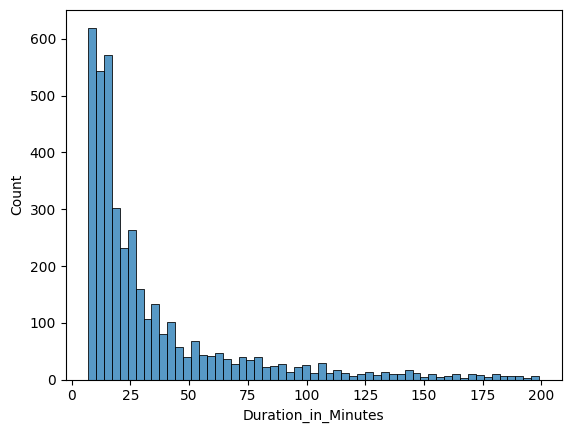

In [13]:
sns.histplot(df_fetch_requests["Duration_in_Minutes"][df_fetch_requests["Duration_in_Minutes"] < 200])

In [14]:
log_minutes = np.log10(df_fetch_requests.Duration_in_Minutes)

Text(0.5, 0, 'Log_10(Duration_in_Minutes)')

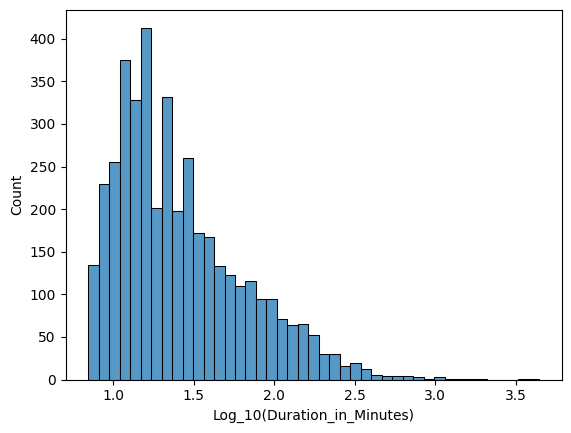

In [15]:
sns.histplot(log_minutes)
plt.xlabel("Log_10(Duration_in_Minutes)")

In [16]:
#df_fetch_requests["INSERT_DTTM"].to_datetime()
df_fetch_requests["INSERT_DATE"] = pd.to_datetime(df_fetch_requests["INSERT_DTTM"]).dt.date
df_fetch_requests["COMPLETE_DATE"] = pd.to_datetime(df_fetch_requests["COMPLETE_DTTM"]).dt.date

In [17]:
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE
0,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28
1,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.021.01,RAW.HNDOFF.02,2025-03-04 23:30:50,2025-03-05 00:20:18,50.0,2025-03-04,2025-03-05
2,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.045.02,RAW.HNDOFF.02,2025-02-10 19:47:19,2025-02-10 19:56:52,9.0,2025-02-10,2025-02-10
3,MIA3,SHV04SPT0524DRN1E,SHRF,SR.N.033.03,RAW.HNDOFF.07,2025-01-28 17:04:43,2025-01-28 17:37:33,33.0,2025-01-28,2025-01-28
4,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.026.02,RAW.HNDOFF.02,2024-11-08 18:17:01,2024-11-08 18:31:08,14.0,2024-11-08,2024-11-08
...,...,...,...,...,...,...,...,...,...,...
4121,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.039.02,RAW.HNDOFF.02,2024-12-28 05:20:39,2024-12-28 06:17:05,57.0,2024-12-28,2024-12-28
4122,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.054.03,RAW.HNDOFF.02,2025-02-23 18:40:57,2025-02-23 18:49:46,9.0,2025-02-23,2025-02-23
4123,MIA5,LBWR05DRMIAV01RC,LABL,SR.S.017.01,RAW.HNDOFF.04,2024-10-01 06:05:19,2024-10-01 08:18:11,133.0,2024-10-01,2024-10-01
4124,MIA5,LBWR05DRMIAV01RC,LABL,SR.S.021.02,RAW.HNDOFF.04,2024-12-12 11:00:19,2024-12-12 11:27:14,27.0,2024-12-12,2024-12-12


In [18]:
#df_produced = pd.read_csv("initial_files/csv_files/lou_total_cases_produced.csv")
#df_produced["Date"] = pd.to_datetime(df_produced["Date"], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
#df_produced.dtypes
#df_produced.head()

In [19]:
# Create the SQLAlchemy engine (FS DB)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={fs_params}")
# Try to connect and execute a simple query
with engine.connect() as connection:

    # Write SQL Query here
    query = text(
                    
"""
    SELECT DISTINCT
    ORG,CONCAT(ORG,RIGHT(LINE,1)) COLLATE DATABASE_DEFAULT AS Prod_Line, CONVERT(DATE, ACTUAL_START_TIME) AS Date, SUM(ACTUAL_QUANTITY) AS Total_Cases_Produced

    FROM history.LMS_Workbench
    WHERE ORG = 'MIA'
    AND LINE NOT LIKE 'INJ%'
    AND DATEDIFF(DAY,ACTUAL_START_TIME, GETDATE()) <= 180

    GROUP BY ORG,CONCAT(ORG,RIGHT(LINE,1)) COLLATE DATABASE_DEFAULT, LINE, CONVERT(DATE, ACTUAL_START_TIME)
    ORDER BY Date
        
"""
                    )

    result = connection.execute(query)
    print(result)
    df_produced = pd.DataFrame(result.fetchall(), columns=result.keys())
    df_produced.Total_Cases_Produced = df_produced.Total_Cases_Produced.astype(int)

In [20]:
df_produced.shape

(520, 4)

In [21]:
# Create the SQLAlchemy engine (FS DB)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={fs_params}")
# Try to connect and execute a simple query
with engine.connect() as connection:

    # Write SQL Query here
    query = text(
                    
"""
    WITH CTE AS (
    SELECT DISTINCT ORG, TC_SHIPMENT_ID, SHIPPED_QTY, CONVERT(DATE, ACTUAL_SHIPPED_DTTM) AS SHIPPED_DATE
    FROM history.MA_ShipmentHistory
    WHERE ORG = 'MIA'
    AND DATEDIFF(DAY,ACTUAL_SHIPPED_DTTM,GETDATE()) <= 180
    )
    ,
    CTE2 AS (
    SELECT ORG, SHIPPED_DATE, SUM(SHIPPED_QTY) AS Total_Cases_Shipped
    FROM CTE
    GROUP BY ORG, SHIPPED_DATE
    )

    SELECT DISTINCT
    ORG, SHIPPED_DATE, CAST(Total_Cases_Shipped AS int) AS Total_Cases_Shipped FROM CTE2
    ORDER BY SHIPPED_DATE

"""
                    )

    result = connection.execute(query)
    print(result)
    df_shipped = pd.DataFrame(result.fetchall(), columns=result.keys())

In [22]:
df_shipped.shape

(150, 3)

In [23]:
df_shipped.dtypes

ORG                    object
SHIPPED_DATE           object
Total_Cases_Shipped     int64
dtype: object

In [24]:
# df_shipped = pd.read_csv("initial_files/csv_files/lou_total_cases_shipped.csv")
# df_shipped["SHIPPED_DATE"] = pd.to_datetime(df_shipped["SHIPPED_DATE"], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
# df_shipped.dtypes

In [25]:
df_fetch_requests["INSERT_DATE"] = pd.to_datetime(df_fetch_requests["INSERT_DATE"])
df_fetch_requests["COMPLETE_DATE"] = pd.to_datetime(df_fetch_requests["COMPLETE_DATE"])
df_fetch_requests["INSERT_DTTM"] = pd.to_datetime(df_fetch_requests["INSERT_DTTM"])
df_fetch_requests["COMPLETE_DTTM"] = pd.to_datetime(df_fetch_requests["COMPLETE_DTTM"])
#df_fetch_requests.dtypes

In [26]:
df_produced["Date"] = pd.to_datetime(df_produced["Date"])
df_shipped["SHIPPED_DATE"] = pd.to_datetime(df_shipped["SHIPPED_DATE"])

In [27]:
df_fetch_requests = pd.merge(df_fetch_requests, df_produced, left_on='INSERT_DATE', right_on='Date', how='left')
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE,ORG,Prod_Line,Date,Total_Cases_Produced
0,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA1,2024-10-28,24920.0
1,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA2,2024-10-28,122630.0
2,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA3,2024-10-28,23072.0
3,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA5,2024-10-28,71098.0
4,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.021.01,RAW.HNDOFF.02,2025-03-04 23:30:50,2025-03-05 00:20:18,50.0,2025-03-04,2025-03-05,MIA,MIA1,2025-03-04,54285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12697,MIA5,LBWR05DRMIAV01RC,LABL,SR.S.021.02,RAW.HNDOFF.04,2024-12-12 11:00:19,2024-12-12 11:27:14,27.0,2024-12-12,2024-12-12,MIA,MIA5,2024-12-12,121886.0
12698,MIA5,LBWR05DRMIAV01RC,LABL,SR.N.025.02,RAW.HNDOFF.04,2024-10-08 12:46:27,2024-10-08 13:03:29,17.0,2024-10-08,2024-10-08,MIA,MIA1,2024-10-08,179673.0
12699,MIA5,LBWR05DRMIAV01RC,LABL,SR.N.025.02,RAW.HNDOFF.04,2024-10-08 12:46:27,2024-10-08 13:03:29,17.0,2024-10-08,2024-10-08,MIA,MIA2,2024-10-08,98218.0
12700,MIA5,LBWR05DRMIAV01RC,LABL,SR.N.025.02,RAW.HNDOFF.04,2024-10-08 12:46:27,2024-10-08 13:03:29,17.0,2024-10-08,2024-10-08,MIA,MIA3,2024-10-08,84334.0


In [28]:
df_fetch_requests = pd.merge(df_fetch_requests, df_shipped, left_on='INSERT_DATE', right_on='SHIPPED_DATE', how='inner')
df_fetch_requests

,Line,item,item_type,FROM_LOCATION,TO_LOCATION,INSERT_DTTM,COMPLETE_DTTM,Duration_in_Minutes,INSERT_DATE,COMPLETE_DATE,ORG_x,Prod_Line,Date,Total_Cases_Produced,ORG_y,SHIPPED_DATE,Total_Cases_Shipped
0,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA1,2024-10-28,24920.0,MIA,2024-10-28,138488
1,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA2,2024-10-28,122630.0,MIA,2024-10-28,138488
2,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA3,2024-10-28,23072.0,MIA,2024-10-28,138488
3,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,MIA,MIA5,2024-10-28,71098.0,MIA,2024-10-28,138488
4,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.021.01,RAW.HNDOFF.02,2025-03-04 23:30:50,2025-03-05 00:20:18,50.0,2025-03-04,2025-03-05,MIA,MIA1,2025-03-04,54285.0,MIA,2025-03-04,276168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10129,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.039.02,RAW.HNDOFF.02,2024-12-28 05:20:39,2024-12-28 06:17:05,57.0,2024-12-28,2024-12-28,MIA,MIA5,2024-12-28,19461.0,MIA,2024-12-28,139200
10130,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.054.03,RAW.HNDOFF.02,2025-02-23 18:40:57,2025-02-23 18:49:46,9.0,2025-02-23,2025-02-23,MIA,MIA2,2025-02-23,80258.0,MIA,2025-02-23,160392
10131,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.054.03,RAW.HNDOFF.02,2025-02-23 18:40:57,2025-02-23 18:49:46,9.0,2025-02-23,2025-02-23,MIA,MIA5,2025-02-23,56567.0,MIA,2025-02-23,160392
10132,MIA5,LBWR05DRMIAV01RC,LABL,SR.S.021.02,RAW.HNDOFF.04,2024-12-12 11:00:19,2024-12-12 11:27:14,27.0,2024-12-12,2024-12-12,MIA,MIA1,2024-12-12,45451.0,MIA,2024-12-12,188168


In [29]:
df_fetch_requests = df_fetch_requests[["Line","item","item_type","FROM_LOCATION","TO_LOCATION","INSERT_DTTM","COMPLETE_DTTM","Duration_in_Minutes","INSERT_DATE","COMPLETE_DATE","Total_Cases_Produced","Total_Cases_Shipped"]]

In [30]:
df_fetch_requests.columns = df_fetch_requests.columns.str.lower().str.replace(' ', '_')

In [31]:
df_fetch_requests = df_fetch_requests.rename(columns={"total_cases_produced": "total_cases_produced_for_day","total_cases_shipped": "total_cases_shipped_for_day", "test":"line"})
df_fetch_requests

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day
0,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,24920.0,138488
1,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,122630.0,138488
2,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,23072.0,138488
3,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,71098.0,138488
4,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.021.01,RAW.HNDOFF.02,2025-03-04 23:30:50,2025-03-05 00:20:18,50.0,2025-03-04,2025-03-05,54285.0,276168
...,...,...,...,...,...,...,...,...,...,...,...,...
10129,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.039.02,RAW.HNDOFF.02,2024-12-28 05:20:39,2024-12-28 06:17:05,57.0,2024-12-28,2024-12-28,19461.0,139200
10130,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.054.03,RAW.HNDOFF.02,2025-02-23 18:40:57,2025-02-23 18:49:46,9.0,2025-02-23,2025-02-23,80258.0,160392
10131,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.054.03,RAW.HNDOFF.02,2025-02-23 18:40:57,2025-02-23 18:49:46,9.0,2025-02-23,2025-02-23,56567.0,160392
10132,MIA5,LBWR05DRMIAV01RC,LABL,SR.S.021.02,RAW.HNDOFF.04,2024-12-12 11:00:19,2024-12-12 11:27:14,27.0,2024-12-12,2024-12-12,45451.0,188168


In [32]:
df_fetch_requests["duration_in_minutes"] = df_fetch_requests["duration_in_minutes"].round(2)

In [33]:
df_fetch_requests

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day
0,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,24920.0,138488
1,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,122630.0,138488
2,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,23072.0,138488
3,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,71098.0,138488
4,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.021.01,RAW.HNDOFF.02,2025-03-04 23:30:50,2025-03-05 00:20:18,50.0,2025-03-04,2025-03-05,54285.0,276168
...,...,...,...,...,...,...,...,...,...,...,...,...
10129,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.039.02,RAW.HNDOFF.02,2024-12-28 05:20:39,2024-12-28 06:17:05,57.0,2024-12-28,2024-12-28,19461.0,139200
10130,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.054.03,RAW.HNDOFF.02,2025-02-23 18:40:57,2025-02-23 18:49:46,9.0,2025-02-23,2025-02-23,80258.0,160392
10131,MIA2,SHV03PBX0515SPN1C,SHRF,SR.S.054.03,RAW.HNDOFF.02,2025-02-23 18:40:57,2025-02-23 18:49:46,9.0,2025-02-23,2025-02-23,56567.0,160392
10132,MIA5,LBWR05DRMIAV01RC,LABL,SR.S.021.02,RAW.HNDOFF.04,2024-12-12 11:00:19,2024-12-12 11:27:14,27.0,2024-12-12,2024-12-12,45451.0,188168


In [34]:
features_list = list(df_fetch_requests.columns)
features_list

['line',
 'item',
 'item_type',
 'from_location',
 'to_location',
 'insert_dttm',
 'complete_dttm',
 'duration_in_minutes',
 'insert_date',
 'complete_date',
 'total_cases_produced_for_day',
 'total_cases_shipped_for_day']

In [35]:
for v in ['MIA1', 'MIA2', 'MIA3', 'MIA5']:
    feature = f"line_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["line"] == v).astype(int)
    features_list.append(feature)

In [36]:
for v in ['SHRF', 'LABL']:
    feature = f"item_type_{v}"
    df_fetch_requests[feature] = (df_fetch_requests["item_type"] == v).astype(int)
    features_list.append(feature)

In [37]:
df_fetch_requests.from_location.value_counts()

from_location
SR.S.015.01    81
SR.N.009.01    77
SR.N.016.01    76
SR.N.004.01    71
SR.N.008.01    67
               ..
SR.S.040.01     2
SR.N.048.01     2
SR.N.012.04     2
SR.S.040.05     1
SR.N.009.05     1
Name: count, Length: 475, dtype: int64

In [38]:
#df_fetch_requests["storage_location_type"] = df_fetch_requests["from_location"].str[0:4]

In [39]:
df_fetch_requests.head()

,line,item,item_type,from_location,to_location,insert_dttm,complete_dttm,duration_in_minutes,insert_date,complete_date,total_cases_produced_for_day,total_cases_shipped_for_day,line_MIA1,line_MIA2,line_MIA3,line_MIA5,item_type_SHRF,item_type_LABL
0,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,24920.0,138488,0,1,0,0,1,0
1,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,122630.0,138488,0,1,0,0,1,0
2,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,23072.0,138488,0,1,0,0,1,0
3,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.019.05,RAW.HNDOFF.02,2024-10-28 02:55:13,2024-10-28 03:12:30,17.0,2024-10-28,2024-10-28,71098.0,138488,0,1,0,0,1,0
4,MIA2,SHV04SPT0524DRN1E,SHRF,SR.N.021.01,RAW.HNDOFF.02,2025-03-04 23:30:50,2025-03-05 00:20:18,50.0,2025-03-04,2025-03-05,54285.0,276168,0,1,0,0,1,0


In [40]:
# df_fetch_requests.total_cases_produced_for_day.isnull().value_counts()
# df_fetch_requests.total_cases_shipped_for_day.isnull().value_counts()
df_fetch_requests.total_cases_produced_for_day = df_fetch_requests.total_cases_produced_for_day.fillna(0)
df_fetch_requests.total_cases_shipped_for_day = df_fetch_requests.total_cases_shipped_for_day.fillna(0)

In [41]:
# for v in ['NR.S', 'SR.S']:
#     feature = f"storage_location_type_{v}"
#     df_fetch_requests[feature] = (df_fetch_requests["storage_location_type"] == v).astype(int)
#     features_list.append(feature)

In [42]:
df_fetch_requests.dtypes

line                                    object
item                                    object
item_type                               object
from_location                           object
to_location                             object
insert_dttm                     datetime64[ns]
complete_dttm                   datetime64[ns]
duration_in_minutes                    float64
insert_date                     datetime64[ns]
complete_date                   datetime64[ns]
total_cases_produced_for_day           float64
total_cases_shipped_for_day              int64
line_MIA1                                int64
line_MIA2                                int64
line_MIA3                                int64
line_MIA5                                int64
item_type_SHRF                           int64
item_type_LABL                           int64
dtype: object

In [43]:
numerical_matrix_df = df_fetch_requests.select_dtypes(include=['int64', 'float'])

In [44]:
numerical_matrix_df

,duration_in_minutes,total_cases_produced_for_day,total_cases_shipped_for_day,line_MIA1,line_MIA2,line_MIA3,line_MIA5,item_type_SHRF,item_type_LABL
0,17.0,24920.0,138488,0,1,0,0,1,0
1,17.0,122630.0,138488,0,1,0,0,1,0
2,17.0,23072.0,138488,0,1,0,0,1,0
3,17.0,71098.0,138488,0,1,0,0,1,0
4,50.0,54285.0,276168,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
10129,57.0,19461.0,139200,0,1,0,0,1,0
10130,9.0,80258.0,160392,0,1,0,0,1,0
10131,9.0,56567.0,160392,0,1,0,0,1,0
10132,27.0,45451.0,188168,0,0,0,1,0,1


In [45]:
# y_train_orig = df_train.duration_in_minutes.values
# y_val_orig = df_val.duration_in_minutes.values
# y_test_orig = df_test.duration_in_minutes.values

# y_train = np.log10(df_train.duration_in_minutes.values)
# y_val = np.log10(df_val.duration_in_minutes.values)
# y_test = np.log10(df_test.duration_in_minutes.values)

In [46]:
# Start with your original DataFrame (before the numerical conversion)
df_fetch_requests_enriched = df_fetch_requests.copy()

# 1. Handle Rare Locations
location_counts = df_fetch_requests_enriched['from_location'].value_counts()
rare_locations = location_counts[location_counts < 10].index
df_fetch_requests_enriched['location_grouped'] = df_fetch_requests_enriched['from_location'].apply(
    lambda x: 'RARE_LOCATION' if x in rare_locations else x
)

# 2. Add Location Statistics
location_avg = df_fetch_requests_enriched.groupby('location_grouped')['duration_in_minutes'].mean().to_dict()
location_median = df_fetch_requests_enriched.groupby('location_grouped')['duration_in_minutes'].median().to_dict()
location_std = df_fetch_requests_enriched.groupby('location_grouped')['duration_in_minutes'].std().fillna(0).to_dict()

df_fetch_requests_enriched['location_avg_time'] = df_fetch_requests_enriched['location_grouped'].map(location_avg)
df_fetch_requests_enriched['location_median_time'] = df_fetch_requests_enriched['location_grouped'].map(location_median)
df_fetch_requests_enriched['location_std_time'] = df_fetch_requests_enriched['location_grouped'].map(location_std)

# # 3. Add Cross Features
# df_fetch_requests_enriched['nr.s_with_shrf'] = ((df_fetch_requests_enriched['storage_location_type'] == 'NR.S') & 
#                                            (df_fetch_requests_enriched['item_type'] == 'SHRF')).astype(int)
# df_fetch_requests_enriched['sr.s_with_labl'] = ((df_fetch_requests_enriched['storage_location_type'] == 'SR.S') & 
#                                            (df_fetch_requests_enriched['item_type'] == 'LABL')).astype(int)

# Time-based features from insert_dttm
# df_fetch_requests_enriched['hour_of_day'] = df_fetch_requests_enriched['insert_dttm'].dt.hour
# df_fetch_requests_enriched['day_of_week'] = df_fetch_requests_enriched['insert_dttm'].dt.dayofweek  # 0=Monday, 6=Sunday

# # Create one-hot encoding for hour of day and day of week
# for hour in range(24):
#     df_fetch_requests_enriched[f'hour_{hour}'] = (df_fetch_requests_enriched['hour_of_day'] == hour).astype(int)

# for day in range(7):
#     df_fetch_requests_enriched[f'day_{day}'] = (df_fetch_requests_enriched['day_of_week'] == day).astype(int)

# # Add features for business hours vs. off-hours
# df_fetch_requests_enriched['business_hours'] = ((df_fetch_requests_enriched['hour_of_day'] >= 8) & 
#                                            (df_fetch_requests_enriched['hour_of_day'] < 17) &
#                                            (df_fetch_requests_enriched['day_of_week'] < 5)).astype(int)

# df_fetch_requests_enriched['night_shift'] = ((df_fetch_requests_enriched['hour_of_day'] >= 19) | 
#                                         (df_fetch_requests_enriched['hour_of_day'] < 7)).astype(int)

# df_fetch_requests_enriched['weekend'] = (df_fetch_requests_enriched['day_of_week'] >= 5).astype(int)

# Calculate cases produced/shipped ratios
# Add a small value to avoid division by zero
epsilon = 1e-10
df_fetch_requests_enriched['cases_ratio'] = df_fetch_requests_enriched['total_cases_produced_for_day'] / (df_fetch_requests_enriched['total_cases_shipped_for_day'] + epsilon)

# Cap extreme ratios to prevent outliers
df_fetch_requests_enriched['cases_ratio'] = df_fetch_requests_enriched['cases_ratio'].clip(0, 10)

# Hour + item_type interaction features
# df_fetch_requests_enriched['morning_shrf'] = ((df_fetch_requests_enriched['hour_of_day'] < 12) & 
#                                          (df_fetch_requests_enriched['item_type'] == 'SHRF')).astype(int)

# df_fetch_requests_enriched['evening_labl'] = ((df_fetch_requests_enriched['hour_of_day'] >= 19) & 
#                                          (df_fetch_requests_enriched['item_type'] == 'LABL')).astype(int)

# Update numerical_columns to include new features
numerical_columns = [
    'duration_in_minutes', 'total_cases_produced_for_day', 'total_cases_shipped_for_day',
    'line_MIA1', 'line_MIA2', 'line_MIA3', 'line_MIA5',
    'item_type_SHRF', 'item_type_LABL', #'storage_location_type_NR.S', 'storage_location_type_SR.S',
    'location_avg_time', 'location_median_time', 'location_std_time',
    # 'nr.s_with_shrf', 'sr.s_with_labl',
    'cases_ratio',
    # 'business_hours', 'night_shift', 'weekend',
    # 'morning_shrf', 'evening_labl'
]

# # Add hour and day dummy variables (dropping one from each to avoid multicollinearity)
# for hour in range(1, 24):  # Skip hour_0 as the reference category
#     numerical_columns.append(f'hour_{hour}')

# for day in range(1, 7):  # Skip day_0 (Monday) as the reference category
#     numerical_columns.append(f'day_{day}')

# Create the numerical matrix with our enhanced features
df_numerical = df_fetch_requests_enriched[numerical_columns]

# Then continue with your existing train/val/test split logic
np.random.seed(2)
n = len(df_numerical)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_numerical.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [47]:
y_train_orig = df_train.duration_in_minutes.values
y_val_orig = df_val.duration_in_minutes.values
y_test_orig = df_test.duration_in_minutes.values

y_train = np.log10(df_train.duration_in_minutes.values)
y_val = np.log10(df_val.duration_in_minutes.values)
y_test = np.log10(df_test.duration_in_minutes.values)

In [48]:
def prepare_X(df):
    df = df.copy()
    
    # Remove target variable if it exists
    if 'duration_in_minutes' in df.columns:
        df = df.drop('duration_in_minutes', axis=1)
    
    # Drop one category from each set of dummy variables to avoid multicollinearity
    columns_to_drop = ['line_MIA5', 'item_type_LABL']   #, 'storage_location_type_SR.S']
    df = df.drop([x for x in columns_to_drop if x in df.columns], axis=1)
    
    feature_names = list(df.columns)
    X = df.values
    return X, feature_names

In [49]:
X_train = prepare_X(df_train)
X_train

(array([[6.51220000e+04, 1.85772000e+05, 0.00000000e+00, ...,
         3.20000000e+01, 4.04099079e+01, 3.50547984e-01],
        [6.73980000e+04, 2.46472000e+05, 1.00000000e+00, ...,
         1.70000000e+01, 1.78556302e+01, 2.73450940e-01],
        [6.79200000e+03, 1.86516000e+05, 1.00000000e+00, ...,
         4.90000000e+01, 6.12288064e+01, 3.64151065e-02],
        ...,
        [6.60470000e+04, 2.06681000e+05, 1.00000000e+00, ...,
         2.20000000e+01, 1.99228671e+01, 3.19560095e-01],
        [7.43220000e+04, 1.77026000e+05, 0.00000000e+00, ...,
         2.00000000e+01, 6.37857208e+01, 4.19836634e-01],
        [4.97700000e+04, 2.25073000e+05, 1.00000000e+00, ...,
         1.40000000e+01, 2.90037167e+01, 2.21128256e-01]]),
 ['total_cases_produced_for_day',
  'total_cases_shipped_for_day',
  'line_MIA1',
  'line_MIA2',
  'line_MIA3',
  'item_type_SHRF',
  'location_avg_time',
  'location_median_time',
  'location_std_time',
  'cases_ratio'])

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Tuned RF Training RMSE: 0.1384
Tuned RF Validation RMSE: 0.3032
1. total_cases_produced_for_day: 0.0936
2. total_cases_shipped_for_day: 0.2407
3. line_MIA1: 0.0310
4. line_MIA2: 0.0267
5. line_MIA3: 0.0249
6. item_type_SHRF: 0.0312
7. location_avg_time: 0.1866
8. location_median_time: 0.1453
9. location_std_time: 0.1171
10. cases_ratio: 0.1028
Feature ranking:
1. total_cases_shipped_for_day (0.2407)
2. location_avg_time (0.1866)
3. location_median_time (0.1453)
4. location_std_time (0.1171)
5. cases_ratio (0.1028)
6. total_cases_produced_for_day (0.0936)
7. item_type_SHRF (0.0312)
8. line_MIA1 (0.0310)
9. line_MIA2 (0.0267)
10. line_MIA3 (0.0249)


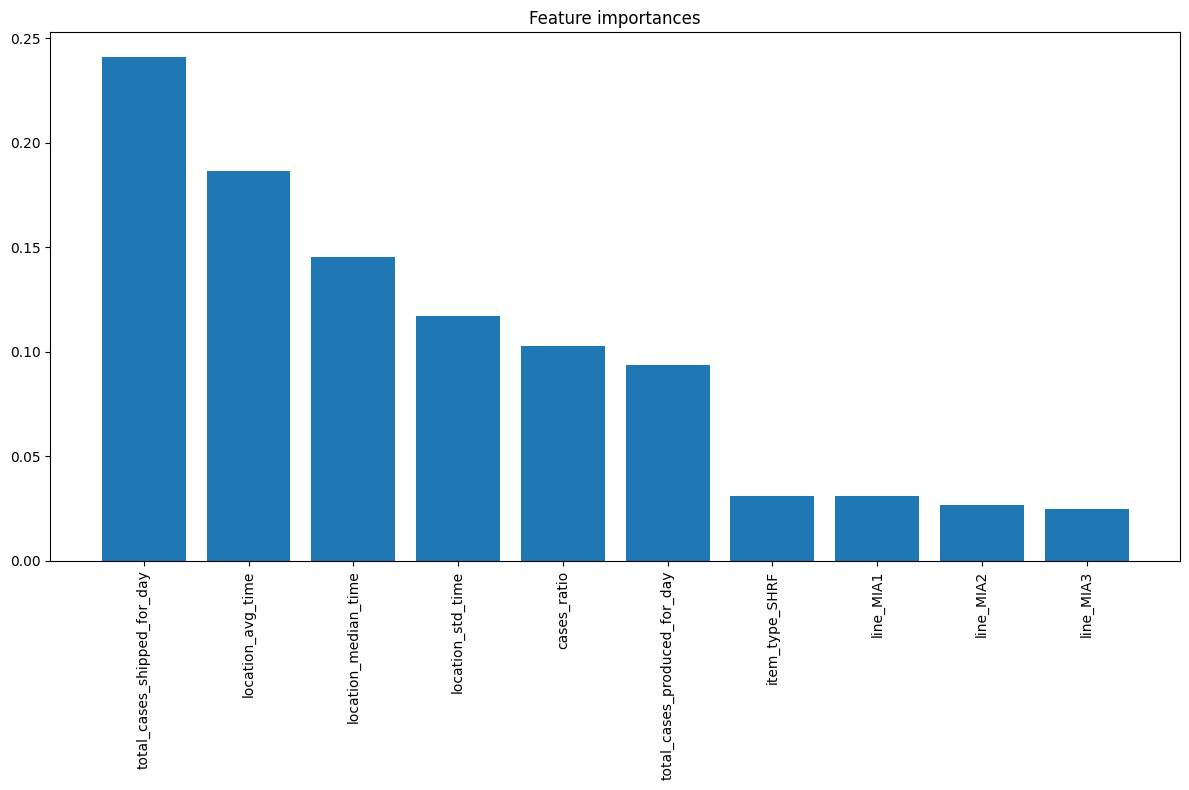

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data
X_train, feature_names = prepare_X(df_train)
X_val, _ = prepare_X(df_val)

# 1. Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                  n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                  random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_
print(f"Best parameters: {random_search.best_params_}")

# 2. Make predictions with the tuned model
y_train_pred_rf = best_rf.predict(X_train)
y_val_pred_rf = best_rf.predict(X_val)

# Calculate RMSE
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))

print(f"Tuned RF Training RMSE: {train_rmse_rf:.4f}")
print(f"Tuned RF Validation RMSE: {val_rmse_rf:.4f}")

# 3. Feature importance analysis
importances = best_rf.feature_importances_
# Get feature names - adjust this depending on how you access column names
#feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train.shape[1])]
indices = np.argsort(importances)[::-1]

# Print direct feature importances
for i, (name, importance) in enumerate(zip(feature_names, importances)):
    if i < 20:  # Just print the first 20
        print(f"{i+1}. {name}: {importance:.4f}")

# Print the feature ranking
print("Feature ranking:")
for f in range(min(20, X_train.shape[1])):
    if f < len(indices):
        feature_idx = indices[f]
        if feature_idx < len(feature_names):
            feature_name = feature_names[feature_idx]
            importance = importances[feature_idx]
            print(f"{f+1}. {feature_name} ({importance:.4f})")

# 4. Plot feature importances (optional)
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(min(20, X_train.shape[1])), 
        [importances[i] for i in indices[:20]],
        align="center")
plt.xticks(range(min(20, X_train.shape[1])), 
           [feature_names[i] for i in indices[:20]], 
           rotation=90)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Log10(duration_in_minutes)')

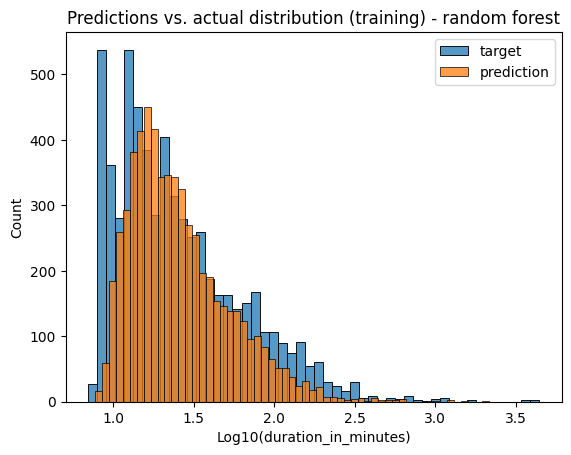

In [51]:
sns.histplot(y_train, label='target')
sns.histplot(y_train_pred_rf, label='prediction')

plt.legend()
plt.title('Predictions vs. actual distribution (training) - random forest')
plt.xlabel('Log10(duration_in_minutes)')

Text(0.5, 0, 'Log10(duration_in_minutes)')

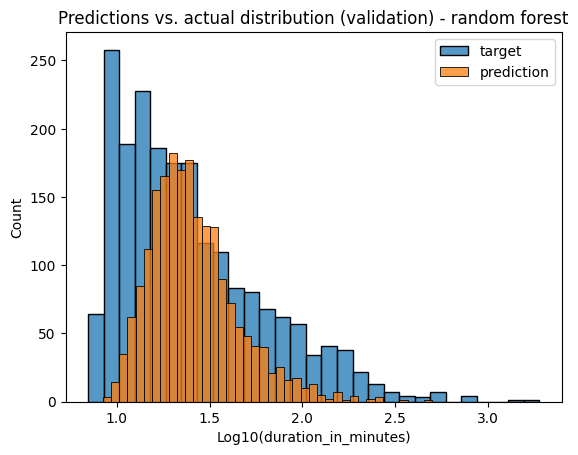

In [52]:
sns.histplot(y_val, label='target')
sns.histplot(y_val_pred_rf, label='prediction')

plt.legend()
plt.title('Predictions vs. actual distribution (validation) - random forest')
plt.xlabel('Log10(duration_in_minutes)')

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare data
X_train, feature_names = prepare_X(df_train)
X_val, _ = prepare_X(df_val)
X_test, _ = prepare_X(df_test)  # If you have test data

# Create model with the best parameters you already found
best_params = {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1}
rf_model = RandomForestRegressor(**best_params, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"RF Training RMSE: {train_rmse:.4f}")
print(f"RF Validation RMSE: {val_rmse:.4f}")

# Feature importance analysis
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(min(10, X_train.shape[1])):
    feature_idx = indices[f]
    feature_name = feature_names[feature_idx]
    importance = importances[feature_idx]
    print(f"{f+1}. {feature_name} ({importance:.4f})")

RF Training RMSE: 0.1384
RF Validation RMSE: 0.3032
Feature ranking:
1. total_cases_shipped_for_day (0.2407)
2. location_avg_time (0.1866)
3. location_median_time (0.1453)
4. location_std_time (0.1171)
5. cases_ratio (0.1028)
6. total_cases_produced_for_day (0.0936)
7. item_type_SHRF (0.0312)
8. line_MIA1 (0.0310)
9. line_MIA2 (0.0267)
10. line_MIA3 (0.0249)
